# Optimize

## curve_fit

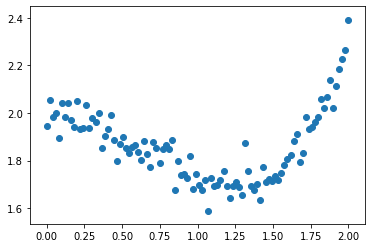

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

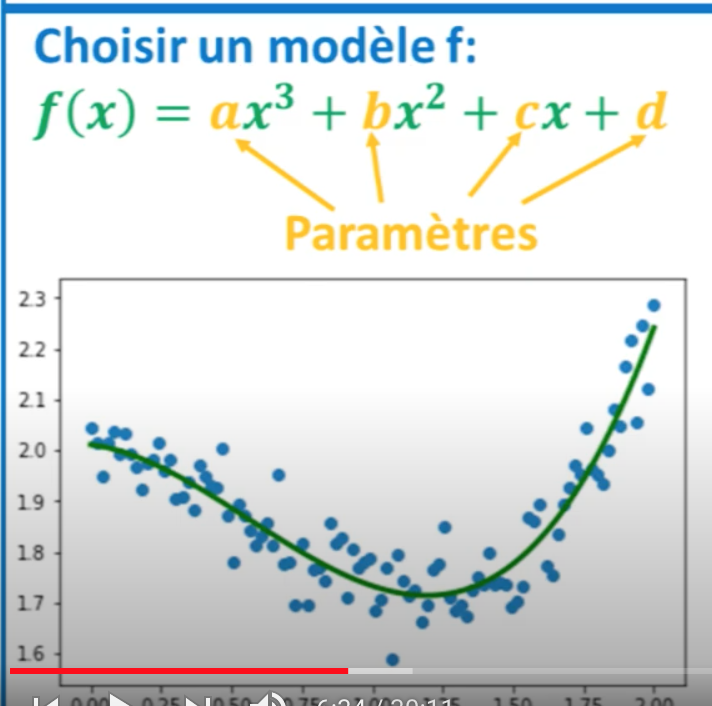

In [7]:
def f(x, a, b, c, d):
    return a * x **3 + b * x**2 + c * x + d

In [8]:
from scipy import optimize

# curve_fit permet de trouver les parametres du modele f grace a la méthode des moindres carrés
params, param_cov = optimize.curve_fit(f, x, y)

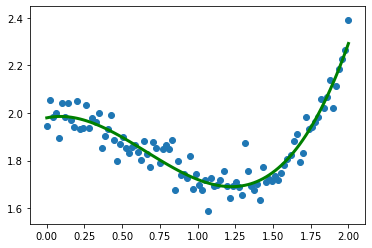

In [12]:
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)

# Minimize

la fonction optimize.minimize est utile pour trouver un minimum local dans une fonction a N dimensions 

In [13]:
# Définition d'une fonction a 1 Dimension
def f(x):
    return x**2 + 15*np.sin(x)

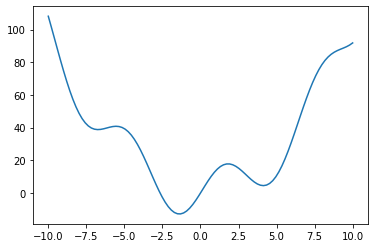

In [14]:
# Visualisation de la fonction
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [15]:
# f représente la fonction f
# x0 quant à lui représente notre point de départ
optimize.minimize(f, x0=-8)

      fun: 38.8112061759585
 hess_inv: array([[0.11637934]])
      jac: array([4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-6.7378995])

In [16]:
# on peut voir qu'on a ici trouver un minimum local à -6.7378995
# on change notre point de départ 
optimize.minimize(f, x0=-5)

      fun: -12.823616887804414
 hess_inv: array([[0.05978678]])
      jac: array([3.57627869e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([-1.38505583])

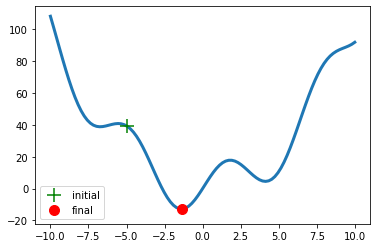

In [17]:
# enregistrer le résultat et l'afficher sur ma courbe
# Visualisation du résultat
x0=-5
result = optimize.minimize(f, x0=x0).x

plt.plot(x, f(x), lw=3, zorder=-1) # Courbe de la fonction
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1, label='initial') # point initial
plt.scatter(result, f(result), s=100, c='r', zorder=1, label='final') # point final
plt.legend()
plt.show()

# Minimisation 2D

In [18]:
# Définition d'une fonction 2D. X est un tableau numpy a 2-Dimension
def f(x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

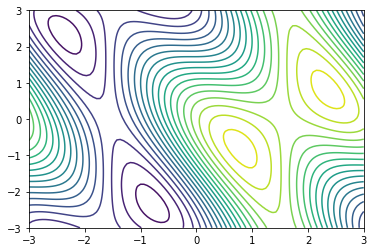

In [19]:
# Génération de la fonction sur un espace 2D.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)

# Visualisation de la fonction
plt.contour(x, y, f(np.array([x, y])), 20)

le minimum est aux coordonées [-0.78539917 -2.35619343]


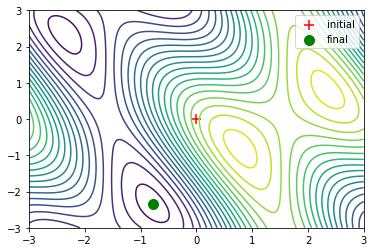

In [20]:
# Placement d'un point x0 initial aux coordonées (0,0)
x0 = np.zeros((2, 1))

# Minimisation de la fonction
result = optimize.minimize(f, x0=x0).x
print('le minimum est aux coordonées', result) # imprimer le résultat

# Visualisation du résultat
plt.contour(x, y, f(np.array([x, y])), 20) # fonction 2D
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100, label='initial') # Point de départ
plt.scatter(result[0], result[1], c='g', s=100, label='final') # Point final
plt.legend()
plt.show()